In [1]:
# Análise de um Sistema representado no Espaçode Estado com equações recursivas na forma expandida

In [2]:
import numpy as np
import sympy as sp
import control
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

import sys
sys.path.append('../')
from control_utils import *

In [3]:
# Matrizes do Sistema
A = np.matrix('0 1 0;0 0 1;-1 -5 -6');
B = np.matrix('0;0;1');
C = np.matrix('1 1 1');
D = 0;
sistema = control.ss(A,B,C,D);
x0 = np.matrix('1; 1; 1')

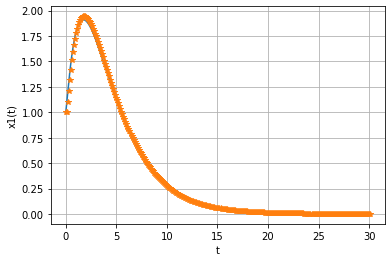

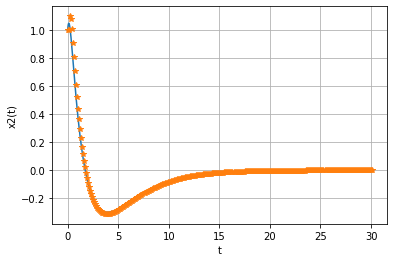

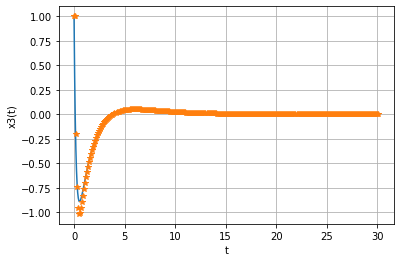

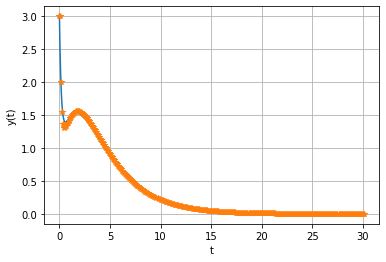

In [5]:
# Recursive equation simulation
Y_reqeq, t_reqeq, X_reqeq = ee_reqeq_exec(
    sys = sistema,
    initial_conditions = x0,
    T = 0.1,
    tfinal = 30,
    input_function = 'none',
)

# this asserts are already in the automated tests
assert_almost_equal([3.00, 3.00, 2.00, 1.55, 1.367, 1.3113, 1.31412, 1.341766, 1.3778901, 1.41470902], Y_reqeq[:10])
assert_almost_equal([0.00054795, 0.00053108, 0.00051472, 0.00049887, 0.00048351, 0.00046862, 0.00045418, 0.0004402 , 0.00042664, 0.], Y_reqeq[-10:])


# matlab Simulation
t = np.linspace(0, 30, 1000);
u = np.zeros(len(t));
Y, t, X = control.matlab.lsim(sistema,u,t,x0);


# comportamento do estado x1                       
plt.figure()
plt.plot(t, X[:,0], t_reqeq, X_reqeq[:, 0],'*')
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()

# comportamento do estado x2                       
plt.figure()
plt.plot(t, X[:,1], t_reqeq, X_reqeq[:, 1],'*')
plt.xlabel("t")
plt.ylabel("x2(t)")
plt.grid(True)
plt.show()

# comportamento do estado x3                       
plt.figure()
plt.plot(t, X[:,2], t_reqeq, X_reqeq[:, 2],'*')
plt.xlabel("t")
plt.ylabel("x3(t)")
plt.grid(True)
plt.show()

# comportamento da saída y                      
plt.figure()
plt.plot(t, Y, t_reqeq, Y_reqeq,'*')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()